In [11]:
# 📦 STEP 1: Generate Realistic E-commerce Sales Dataset

import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Parameters
num_rows = 500
start_date = datetime(2023, 1, 1)

# Generate random dates
dates = [start_date + timedelta(days=np.random.randint(0, 730)) for _ in range(num_rows)]

# Categories & products
categories = ["Electronics", "Clothing", "Home Decor", "Beauty", "Sports"]
products = {
    "Electronics": ["Smartphone", "Laptop", "Headphones", "Smartwatch", "Tablet"],
    "Clothing": ["T-Shirt", "Jeans", "Jacket", "Dress", "Sneakers"],
    "Home Decor": ["Lamp", "Curtains", "Cushion", "Wall Clock", "Vase"],
    "Beauty": ["Perfume", "Lotion", "Lipstick", "Shampoo", "Face Cream"],
    "Sports": ["Football", "Tennis Racket", "Yoga Mat", "Dumbbells", "Cycling Helmet"]
}
regions = ["North", "South", "East", "West"]

# Generate data rows
data = []
for _ in range(num_rows):
    category = random.choice(categories)
    product = random.choice(products[category])
    quantity = np.random.randint(1, 10)
    unit_price = round(np.random.uniform(10, 500), 2)
    total = round(quantity * unit_price, 2)
    
    # Profit = linear relation (25% of total) + small random noise
    profit = round(total * 0.25 + np.random.normal(0, 20), 2)
    profit = max(profit, 0)  # prevent negative profits
    
    region = random.choice(regions)
    
    data.append([
        f"ORD-{np.random.randint(1000, 9999)}",
        random.choice(dates),
        product,
        category,
        quantity,
        unit_price,
        total,
        profit,
        region
    ])

# Create DataFrame
columns = ["Order ID", "Date", "Product", "Category", "Quantity", "Unit Price", "Total", "Profit", "Region"]
df = pd.DataFrame(data, columns=columns)

# Save dataset
df.to_csv("ecommerce_sales_data.csv", index=False)

print("✅ Data generated successfully and saved as 'ecommerce_sales_data.csv'")
print(df.head())


✅ Data generated successfully and saved as 'ecommerce_sales_data.csv'
   Order ID       Date         Product     Category  Quantity  Unit Price  \
0  ORD-9002 2023-04-09      Smartphone  Electronics         1      234.54   
1  ORD-4913 2024-01-08           Jeans     Clothing         1      480.98   
2  ORD-9967 2024-10-25        Football       Sports         2       29.09   
3  ORD-4974 2023-02-02      Smartphone  Electronics         2      137.74   
4  ORD-8543 2024-08-09  Cycling Helmet       Sports         4      349.52   

     Total  Profit Region  
0   234.54   72.37   East  
1   480.98  121.66  North  
2    58.18    0.00   West  
3   275.48   91.21  South  
4  1398.08  360.11  North  


In [12]:
# -----------------------------------
# 📊 STEP 2: Model Training & Accuracy Test
# -----------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("ecommerce_sales_data.csv")

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing or invalid data (if any)
df.dropna(inplace=True)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=["Category", "Region"], drop_first=True)

# Define features (X) and target (y)
X = df_encoded[["Quantity", "Unit Price", "Total"] + 
               [col for col in df_encoded.columns if "Category_" in col or "Region_" in col]]
y = df_encoded["Profit"]

# Split dataset into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n📈 MODEL EVALUATION")
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# Add predictions to the dataset for analysis
df_results = X_test.copy()
df_results["Actual Profit"] = y_test.values
df_results["Predicted Profit"] = y_pred
df_results["Error"] = df_results["Actual Profit"] - df_results["Predicted Profit"]

# Save cleaned/preprocessed dataset for Power BI or visualization
df_encoded.to_csv("ecommerce_sales_data_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'ecommerce_sales_data_cleaned.csv'")


Missing values per column:
 Order ID      0
Date          0
Product       0
Category      0
Quantity      0
Unit Price    0
Total         0
Profit        0
Region        0
dtype: int64

📈 MODEL EVALUATION
R² Score (Accuracy): 99.40%
Mean Absolute Error: 18.20
Root Mean Squared Error: 22.44

✅ Cleaned dataset saved as 'ecommerce_sales_data_cleaned.csv'


Loaded Columns: ['Order ID', 'Date', 'Product', 'Quantity', 'Unit Price', 'Total', 'Profit', 'Category_Clothing', 'Category_Electronics', 'Category_Home Decor', 'Category_Sports', 'Region_North', 'Region_South', 'Region_West']
⚠️ No 'Category' column → Skipping Category Revenue Plot


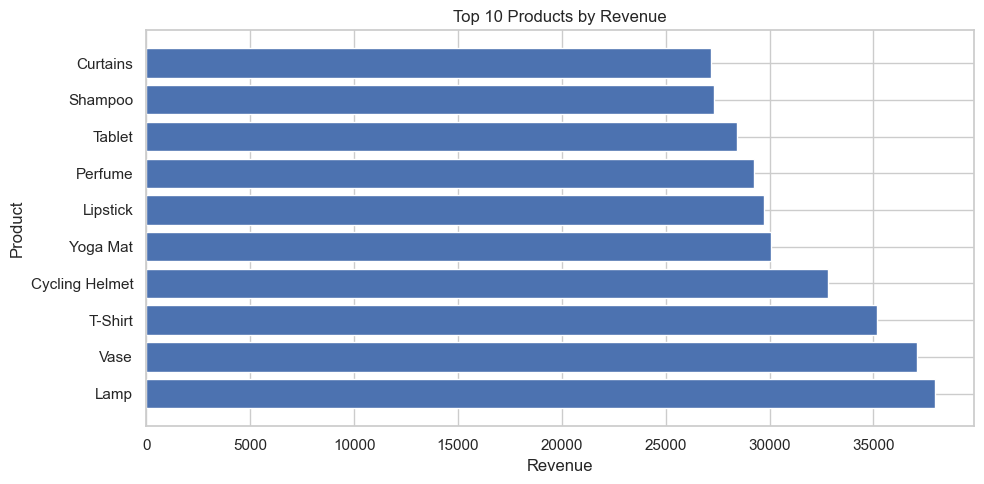

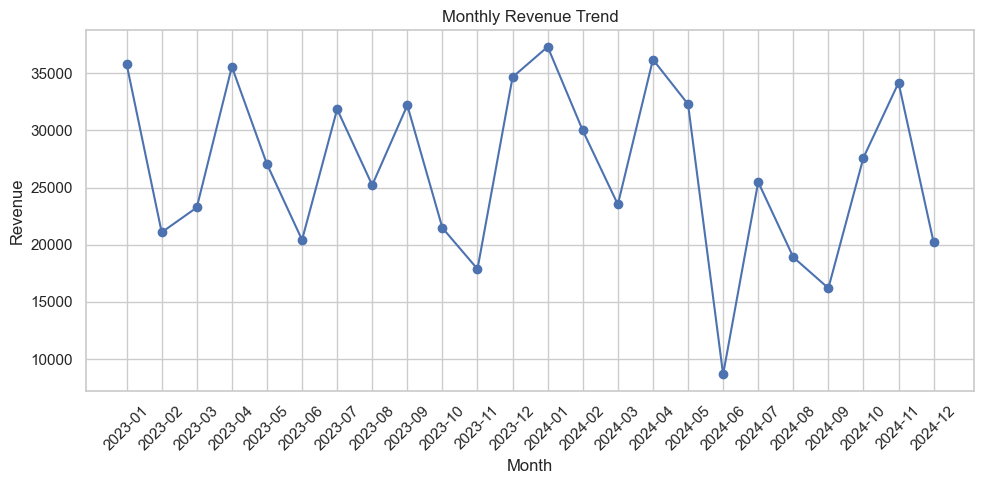

⚠️ No 'Region' column → Skipping Region Plot


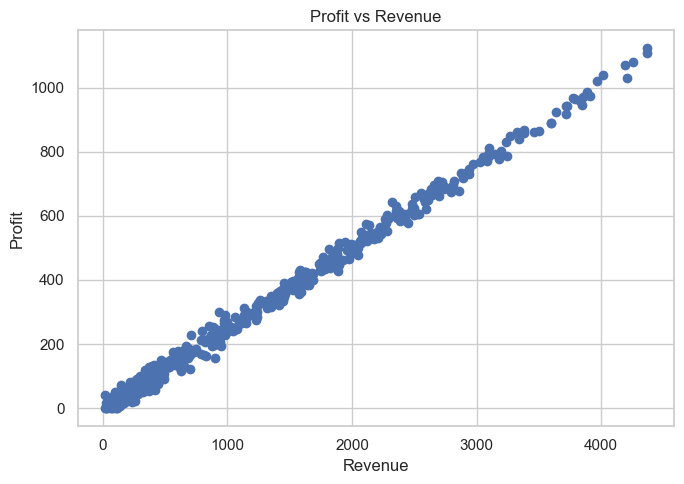


📈 KPI SUMMARY
Total Revenue: 637,130.91
Total Profit: 159,844.25
Average Profit Margin: 25.09%
Top Category: Not available
Best-Selling Product: Lamp

✅ Visualization completed successfully!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# LOAD DATA
# -------------------------
df = pd.read_csv("ecommerce_sales_data_cleaned.csv")

print("Loaded Columns:", df.columns.tolist())

# -------------------------
# ENSURE Revenue EXISTS
# -------------------------
if "Revenue" not in df.columns:
    if "Total" in df.columns:
        df["Revenue"] = df["Total"]
    else:
        raise ValueError("Neither 'Revenue' nor 'Total' column exists. Cannot compute revenue.")

# -------------------------
# DATE HANDLING
# -------------------------
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    df["Month_Year"] = df["Date"].dt.to_period("M").astype(str)
else:
    print("⚠️ No Date column found → Monthly trend will be skipped.")

# -------------------------
# 1️⃣ TOTAL REVENUE BY CATEGORY
# -------------------------
if "Category" in df.columns:
    category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

    plt.figure(figsize=(8, 5))
    plt.bar(category_revenue.index, category_revenue.values)
    plt.title("Total Revenue by Category")
    plt.xlabel("Category")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'Category' column → Skipping Category Revenue Plot")

# -------------------------
# 2️⃣ TOP 10 PRODUCTS BY REVENUE
# -------------------------
if "Product" in df.columns:
    top_products = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 5))
    plt.barh(top_products.index, top_products.values)
    plt.title("Top 10 Products by Revenue")
    plt.xlabel("Revenue")
    plt.ylabel("Product")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'Product' column → Skipping Top Product Plot")

# -------------------------
# 3️⃣ MONTHLY REVENUE TREND
# -------------------------
if "Month_Year" in df.columns:
    monthly_sales = df.groupby("Month_Year")["Revenue"].sum().reset_index()

    plt.figure(figsize=(10, 5))
    plt.plot(monthly_sales["Month_Year"], monthly_sales["Revenue"], marker="o")
    plt.title("Monthly Revenue Trend")
    plt.xlabel("Month")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No Date/Month_Year → Skipping Monthly Trend Plot")

# -------------------------
# 4️⃣ REGIONAL SALES PERFORMANCE
# -------------------------
if "Region" in df.columns:
    region_sales = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False)

    plt.figure(figsize=(7, 5))
    plt.bar(region_sales.index, region_sales.values)
    plt.title("Revenue by Region")
    plt.xlabel("Region")
    plt.ylabel("Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'Region' column → Skipping Region Plot")

# -------------------------
# 5️⃣ PROFIT vs REVENUE
# -------------------------
if "Profit" in df.columns:
    plt.figure(figsize=(7, 5))
    plt.scatter(df["Revenue"], df["Profit"])
    plt.title("Profit vs Revenue")
    plt.xlabel("Revenue")
    plt.ylabel("Profit")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No 'Profit' column → Skipping Profit vs Revenue Scatter Plot")

# -------------------------
# 6️⃣ KPI SUMMARY
# -------------------------
total_revenue = df["Revenue"].sum()
total_profit = df["Profit"].sum() if "Profit" in df.columns else None

print("\n📈 KPI SUMMARY")
print(f"Total Revenue: {total_revenue:,.2f}")

if total_profit is not None:
    print(f"Total Profit: {total_profit:,.2f}")
    print(f"Average Profit Margin: {round((total_profit / total_revenue) * 100, 2)}%")
else:
    print("Profit column missing → Cannot compute profit KPIs.")

if "Category" in df.columns:
    print("Top Category:", df.groupby("Category")["Revenue"].sum().idxmax())
else:
    print("Top Category: Not available")

if "Product" in df.columns:
    print("Best-Selling Product:", df.groupby("Product")["Revenue"].sum().idxmax())
else:
    print("Best-Selling Product: Not available")

print("\n✅ Visualization completed successfully!")
